Hello

/var/folders/7_/gf8cfhls5wq1zb7rm7m0jtkr0000gn/T/ipykernel_53914/2312917526.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


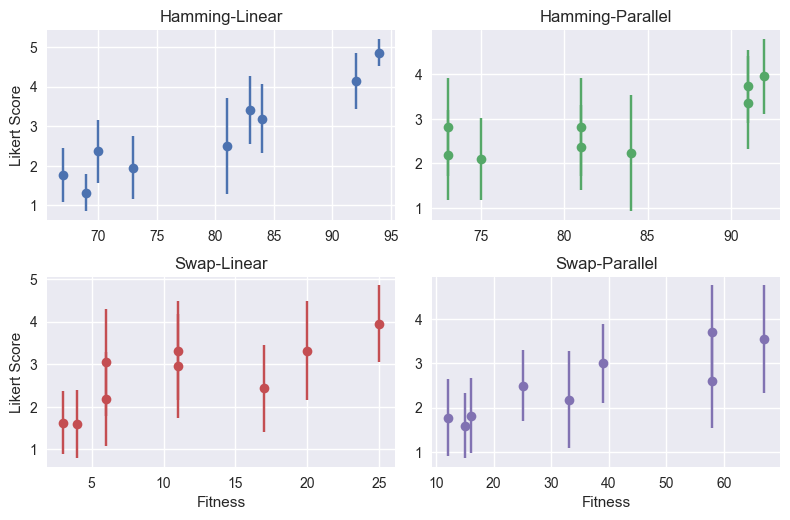

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fontsize=15
# plt.figure(figsize=(8.1, 7.1))
plt.style.use('seaborn')

df = pd.read_csv('user_scores.csv')

#Don't worry about "Interestingness
df = df.loc[(df["Question"] == "similarity")]

#Get the information we need
hamming_linear = df.loc[(df["Measure"] == "Hamming") & (df["patternType"] == "Linear")]
hamming_parallel = df.loc[(df["Measure"] == "Hamming") & (df["patternType"] == "Parallel")]
swap_linear = df.loc[(df["Measure"] == "Swap") & (df["patternType"] == "Linear")]
swap_parallel = df.loc[(df["Measure"] == "Swap") & (df["patternType"] == "Parallel")]

#A reusable plot function
def plotItem(df, title, key, colour, xLabel=False, yLabel=False):
    plt.subplot(key)
    
    #Get stats by file
    df_grouped = df.groupby("fileName")
    
    #Keep the ones we need
    df_stats = df_grouped.describe()
    df_stats = df_stats.loc[:, [('Fitness', 'mean'), ('Score', 'mean'), ('Score', 'std')]]
    
    #Get a numpy matrix
    df_mat = df_stats.values

    #Finally plot
    plt.errorbar(df_mat[:,0], df_mat[:,1], yerr=df_mat[:,2], fmt='o', capsize=2, color=colour)
    plt.title(title)
    
    if xLabel:
        plt.xlabel("Fitness")
    if yLabel:
        plt.ylabel("Likert Score")
    
plotItem(hamming_linear, "Hamming-Linear", 221, "C0", xLabel=False, yLabel=True)
plotItem(hamming_parallel, "Hamming-Parallel", 222, "C1", xLabel=False, yLabel=False)
plotItem(swap_linear, "Swap-Linear", 223, "C2", xLabel=True, yLabel=True)
plotItem(swap_parallel, "Swap-Parallel", 224, "C3", xLabel=True, yLabel=False)

# plt.suptitle('(b) Fitness-Likert by Measure and String Type', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig("separate_likerts.pdf", bbox_inches='tight', dpi=1200)

plt.show()

In [3]:
import seaborn as sns

# fontsize=15
# plt.figure(figsize=(10.1, 7.1))


#Get stats by file
df_grouped = df.groupby("fileName")
    
#Keep the ones we need
df_stats = df_grouped.describe()

#Keep the statistics we need
df_stats = df_stats.loc[:, [('Fitness', 'mean'), ('Score', 'mean'), ('Score', 'std')]]

#Flatten Multi-Index
df_stats.columns = df_stats.columns.get_level_values(0)

#Rename columns to get rid of duplicates
df_stats.columns = ["Fitness", "Mean", "STD"]

#Sort the values
df_stats = df_stats.sort_values("Fitness")

#Convert to Numpy
df_matrix = df_stats.as_matrix()

#Sort by Fitness ascending
df_matrix_sorted = df_matrix[df_matrix[:,0].argsort()]

# print(df_matrix_sorted)
    
plt.figure(1)

#Generate a linear range
x = range(len(df_matrix_sorted))

plt.errorbar(x, df_matrix_sorted[:,1], yerr=df_matrix_sorted[:,2], fmt='--o', capsize=2, label="Likert Mean/Std.")

#Normalise the fitness
df_matrix_sorted[:,0] /= 100.0
df_matrix_sorted[:,0] *= 4.0
df_matrix_sorted[:,0] += 1.0

plt.plot(x, df_matrix_sorted[:, 0], label="Normalised Fitness")

plt.legend(frameon=True, framealpha=0.75)
plt.xlabel("Stimulus Number")
plt.ylabel("Likert Score")
# plt.title('(a) Fitness-Likert by Stimulus')
plt.savefig("total_likert.pdf", bbox_inches='tight', dpi=1200)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'